In [5]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

In [17]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, t_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

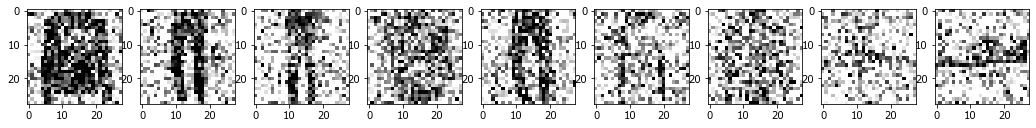

In [7]:
#adding some noise
noise_factor = 0.45
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

#Displaying images with noise
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
plt.show()


In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.add(MaxPooling2D((2, 2), padding='same'))

In [10]:
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')

Instructions for updating:
Use tf.cast instead.


In [12]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         2312      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
__________

In [13]:
model.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True, 
          validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 77s 1ms/sample - loss: 0.0484 - val_loss: 0.0296
Epoch 2/10
60000/60000 [==============================] - 76s 1ms/sample - loss: 0.0277 - val_loss: 0.0262
Epoch 3/10
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.0255 - val_loss: 0.0248
Epoch 4/10
60000/60000 [==============================] - 82s 1ms/sample - loss: 0.0243 - val_loss: 0.0238
Epoch 5/10
60000/60000 [==============================] - 82s 1ms/sample - loss: 0.0232 - val_loss: 0.0229
Epoch 6/10
60000/60000 [==============================] - 82s 1ms/sample - loss: 0.0224 - val_loss: 0.0222
Epoch 7/10
60000/60000 [==============================] - 82s 1ms/sample - loss: 0.0219 - val_loss: 0.0218
Epoch 8/10
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.0215 - val_loss: 0.0214
Epoch 9/10
60000/60000 [======================

In [14]:
model.evaluate(x_test_noisy, x_test)

model.save('denoising_autoencoder.model')

10000/10000 [==============================] - 3s 315us/sample - loss: 0.0209


In [15]:
no_noise_img = model.predict(x_test_noisy)

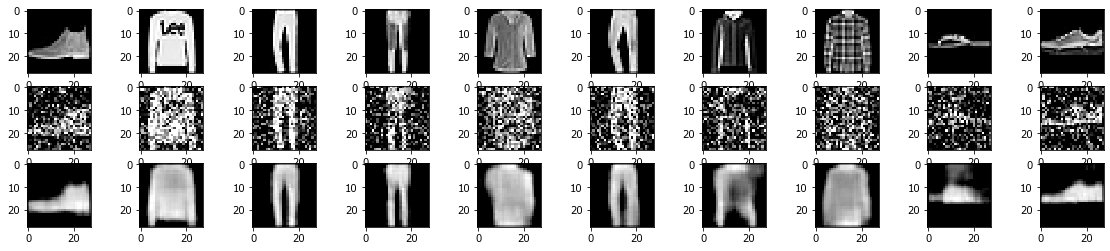

In [34]:
plt.figure(figsize=(40, 4))
for i in range(10):
    #before noise
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    
    # display original
    ax = plt.subplot(3, 20, 20 +i+ 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="gray")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i].reshape(28, 28), cmap="gray")

plt.show()